# Modeling CO2 Emissions through Gradient Descent

## **Setup**

#### **Importing Libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **Loading Data**


In [16]:
df = pd.read_csv('annual_global_CO2_levels', delimiter = "\t", names = ["Year", "CO2 Level"], skiprows = 1)

#### **Graphing Data**

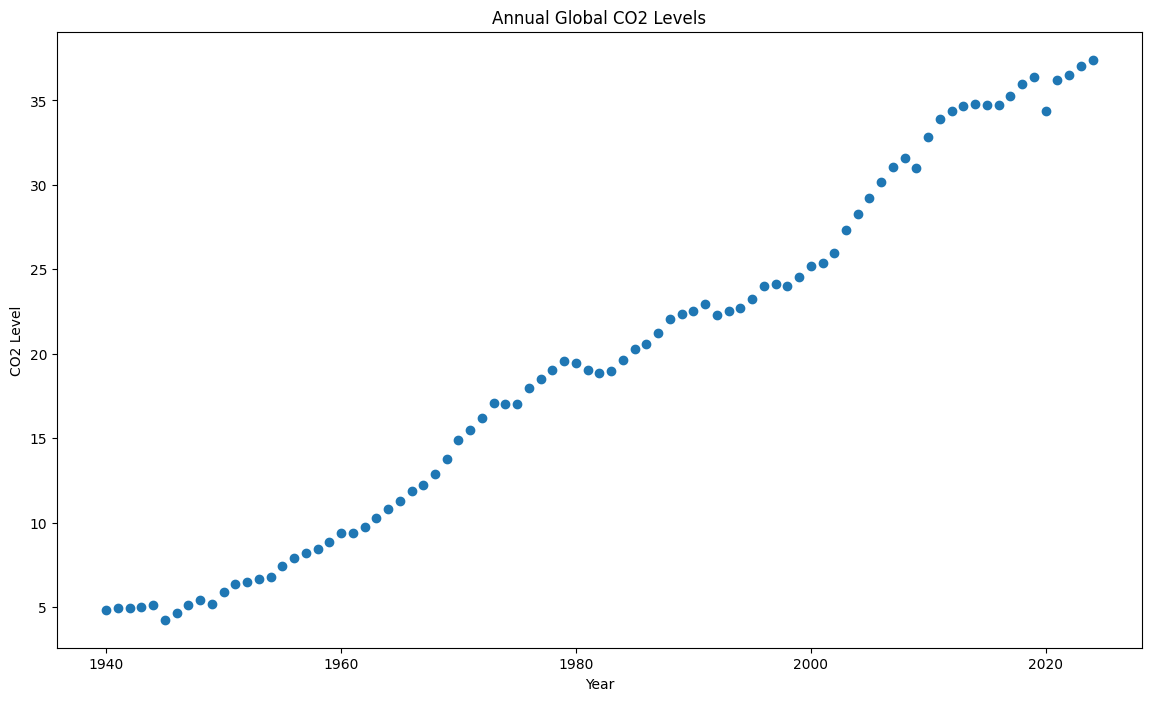

In [17]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'])
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

#### **Scaling Data**

Scaling is required here because the x-values are in thousands and the y-values are in single or double digits.

In [ ]:
X = df['Year'].values.astype(np.float32)
X = (X - X.min()) / (X.max() - X.min())
y = df['CO2 Level'].values.astype(np.float32)

#### **Splitting Data**

Splitting the data into training, validation, and testing sets.

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=2)

## **Modeling**

#### **Linear Model**

In [21]:
def linearModel(m: float, b: float, set:np.ndarray) -> float:
    return m * set + b

Lets do some brief calculations to get an initial guess of the parameters.

$$ m \approx \frac{37 - 5}{1-0} \approx 32 $$

so lets start with the initial model of: 

$$ y = 32x + 4 $$

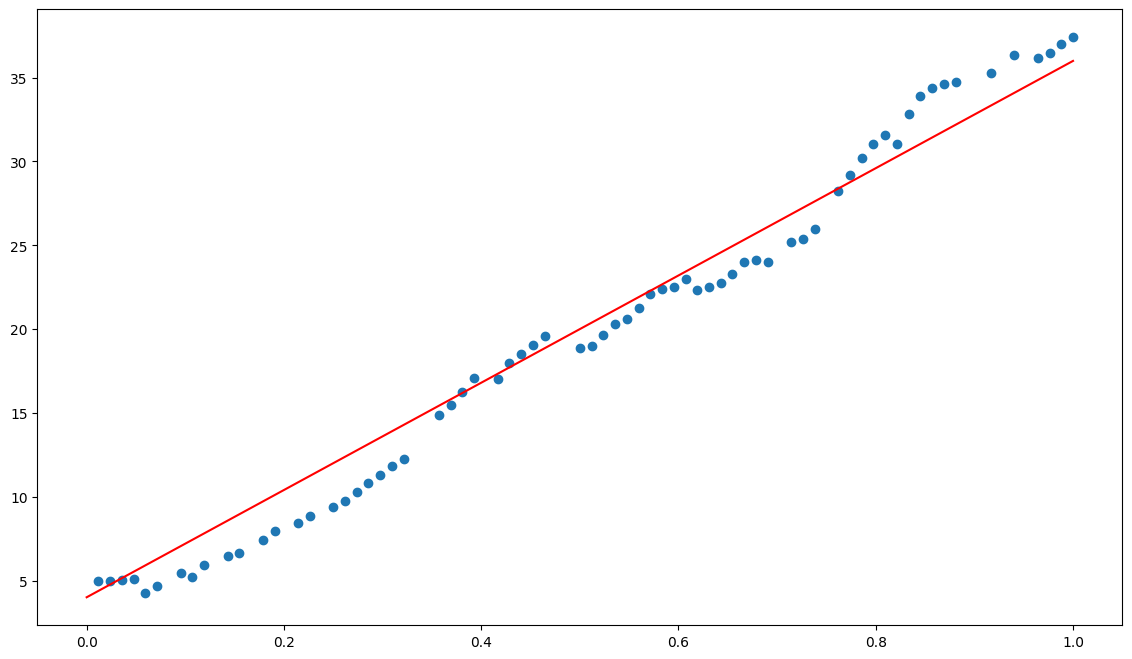

In [40]:
m = 32
b = 4

x = np.linspace(0, 1, 200)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, color = 'red')
plt.scatter(X_train, y_train)

plt.show()

That doesn't look too bad. Let's perform gradient descent and figure out our hyperparameters for the model using our validation set. I'll pick the error function to be the mean absolute error:

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [41]:
def linearError(m: float, b: float, X:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(linearModel(m, b, X) - y)))

In [46]:
# Hyperparameters
learning_rate = 1E-4
epochs = 2000

# initial parameters 
m = 32
b = 4

# Number of samples
n = len(X_train)

# Epoch data 
trainig_losses = []
validation_losses = []

# Training loop
for epoch in range(epochs):
    
    y_pred_train = linearModel(m, b, X_train)
    residuals = y_pred_train - y_train

    # Compute derivatives
    dm = 1/n * np.sum(residuals * X_train)
    db = 1/n * np.sum(residuals)

    # Update parameters
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Compute training loss
    training_loss = linearError(m, b, X_train, y_train)
    trainig_losses.append(training_loss)

    # Compute validation loss
    loss_val = linearError(m, b, X_val, y_val)
    validation_losses.append(loss_val)

    # Print progress every n epochs
    n = 250
    if epoch % n == 0:
        print(f'Epoch: {epoch}, Loss: {training_loss}, Validation Loss: {loss_val}, m: {m}, b: {b}')

# Print final loss and parameters
print(f'Final Training Loss: {linearError(m, b, X_train, y_train)}')
print(f'Final Validation Loss: {linearError(m, b, X_val, y_val)}')
print(f'm: {m}, b: {b}')

Epoch: 0, Loss: 1.4259446859359741, Validation Loss: 1.2211185693740845, m: 32.000003174849816, b: 3.9999508382292355
Epoch: 250, Loss: 1.4249688386917114, Validation Loss: 1.220285177230835, m: 32.000224705731135, b: 3.9966190791655145
Epoch: 500, Loss: 1.423999547958374, Validation Loss: 1.2194573879241943, m: 32.000457170323884, b: 3.993309118890246
Epoch: 750, Loss: 1.423036813735962, Validation Loss: 1.218634843826294, m: 32.00070046880592, b: 3.9900207725004724
Epoch: 1000, Loss: 1.4220800399780273, Validation Loss: 1.217818021774292, m: 32.00095450195915, b: 3.98675385624681
Epoch: 1250, Loss: 1.4211301803588867, Validation Loss: 1.2170064449310303, m: 32.00121917161102, b: 3.983508188290267
Epoch: 1500, Loss: 1.4201866388320923, Validation Loss: 1.2161996364593506, m: 32.00149438019952, b: 3.9802835880262872
Epoch: 1750, Loss: 1.419249176979065, Validation Loss: 1.2153980731964111, m: 32.001780031438315, b: 3.977079876990361
Final Training Loss: 1.418321967124939
Final Validati

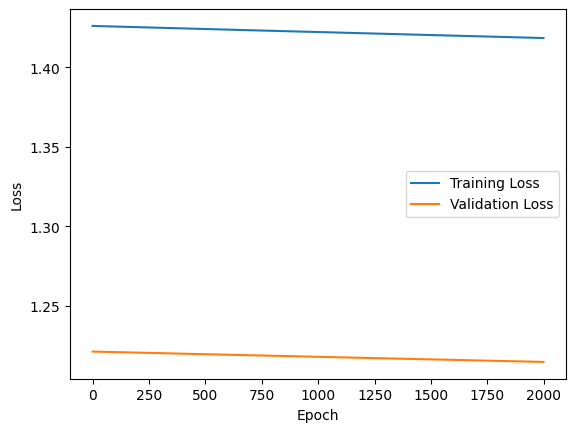

In [47]:
plt.plot(trainig_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

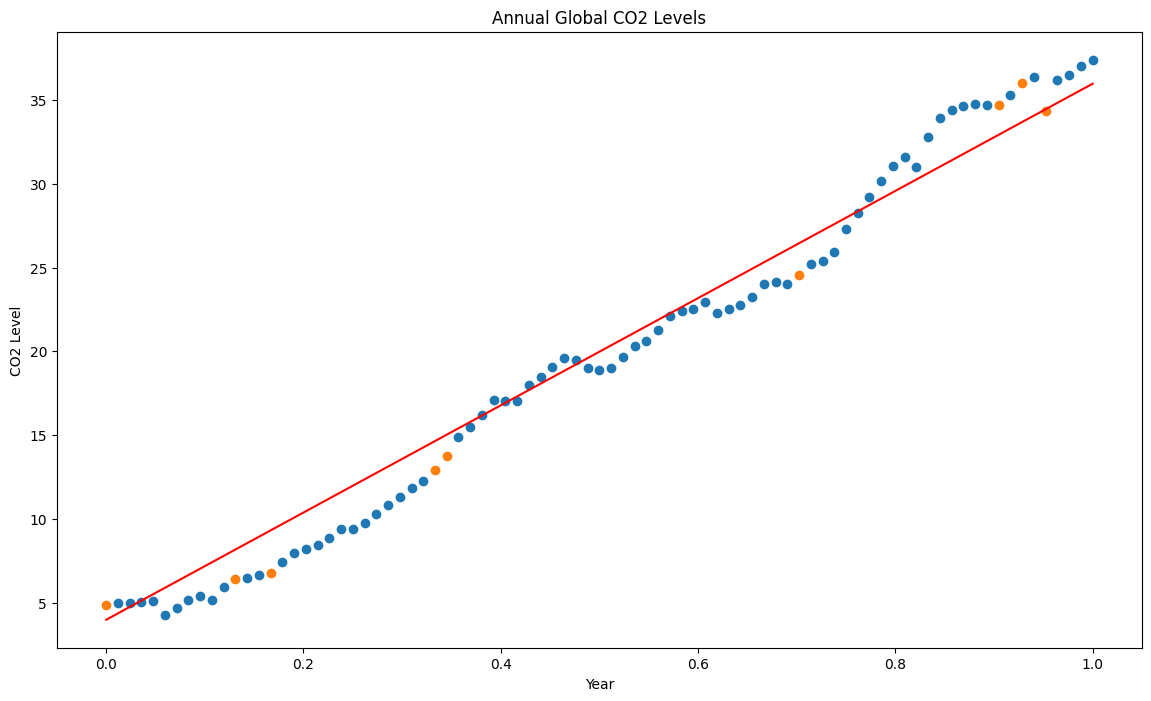

In [48]:
#plot our model with our data 
x = np.linspace(0, 1, 200)
y = linearModel(m, b, x)
plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r')
plt.scatter(X_train_val, y_train_val)
plt.scatter(X_test, y_test) 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

Based on this work, the linear model we came up with is:

$$ y = 32x + 3.97 $$